In [16]:
import openpyxl
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import time

In [17]:
orders_file = 'data/orders.xlsx'
workbook = openpyxl.load_workbook(orders_file)

In [18]:
sheetnames= workbook.get_sheet_names()
print(sheetnames)

['Microsofts', 'Netflix']


C:\Users\Thumbby\AppData\Local\Temp\ipykernel_7092\2214667223.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  sheetnames= workbook.get_sheet_names()


In [19]:
sheetMSFT = workbook.worksheets[0]
sheetNFLX = workbook.worksheets[1]
sheetMSFTNAME = sheetMSFT.title
sheetNFLXNAME = sheetNFLX.title
print(sheetMSFTNAME)
print(sheetNFLXNAME)

Microsofts
Netflix


In [20]:
# excelbids = defaultdict(lambda:defaultdict(list))
'''excelbids['BATS'] = {}
excelbids['BATS'][sheetMSFTNAME] = defaultdict(list)
excelbids['BATS'][sheetNFLXNAME] = defaultdict(list)
excelbids['NASD'] = {}
excelbids['NASD'][sheetMSFTNAME] = defaultdict(list)
excelbids['NASD'][sheetNFLXNAME] = defaultdict(list)'''
# excelasks = defaultdict(lambda:defaultdict(list))
'''excelasks['BATS'] = {}
excelasks['BATS'][sheetMSFTNAME] = defaultdict(list)
excelasks['BATS'][sheetNFLXNAME] = defaultdict(list)
excelasks['NASD'] = {}
excelasks['NASD'][sheetMSFTNAME] = defaultdict(list)
excelasks['NASD'][sheetNFLXNAME] = defaultdict(list)'''


"excelasks['BATS'] = {}\nexcelasks['BATS'][sheetMSFTNAME] = defaultdict(list)\nexcelasks['BATS'][sheetNFLXNAME] = defaultdict(list)\nexcelasks['NASD'] = {}\nexcelasks['NASD'][sheetMSFTNAME] = defaultdict(list)\nexcelasks['NASD'][sheetNFLXNAME] = defaultdict(list)"

In [21]:
# Get the dictionary of price-to-qunatity
excelbids = defaultdict(lambda:defaultdict(list))
excelasks = defaultdict(lambda:defaultdict(list))
for i in range(3, 8):
	for j in range(1, 2):
		excelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])

for i in range (10, 15):
	for j in range(1, 2):
		excelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])

for i in range(3, 8):
	for j in range(1, 2):
		excelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])

for i in range (10, 15):
	for j in range(1, 2):
		excelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])
		
print(excelbids)
print(excelasks)

defaultdict(<function <lambda> at 0x000001D876B51510>, {'Microsofts': defaultdict(<class 'list'>, {183.65: [['NASD', 500], ['BATS', 30]], 183.64: [['NASD', 200], ['BATS', 450]], 183.63: [['NASD', 500]], 183.92: [['NASD', 1450]], 183.81: [['NASD', 1000]], 183.73: [['BATS', 175]], 183.62: [['BATS', 400]], 183.71: [['BATS', 1050]]}), 'Netflix': defaultdict(<class 'list'>, {366.97: [['NASD', 500]], 366.96: [['NASD', 200]], 366.95: [['NASD', 500], ['BATS', 30], ['BATS', 450]], 366.94: [['NASD', 1450], ['BATS', 175]], 366.93: [['NASD', 1000], ['BATS', 400]], 366.92: [['BATS', 1050]]})})
defaultdict(<function <lambda> at 0x000001D8780B7D90>, {'Microsofts': defaultdict(<class 'list'>, {183.91: [['NASD', 100], ['BATS', 500]], 183.97: [['NASD', 300]], 183.93: [['NASD', 1075]], 183.94: [['NASD', 800], ['BATS', 400]], 183.85: [['NASD', 200]], 183.95: [['BATS', 1125]], 183.96: [['BATS', 675]], 183.78: [['BATS', 180]]}), 'Netflix': defaultdict(<class 'list'>, {367.23: [['NASD', 100], ['BATS', 500]],

In [22]:
print(type(excelasks['Microsofts']))
print(excelasks['Microsofts'].keys())
print(sorted(excelasks['Microsofts'].items(), reverse=True))

<class 'collections.defaultdict'>
dict_keys([183.91, 183.97, 183.93, 183.94, 183.85, 183.95, 183.96, 183.78])
[(183.97, [['NASD', 300]]), (183.96, [['BATS', 675]]), (183.95, [['BATS', 1125]]), (183.94, [['NASD', 800], ['BATS', 400]]), (183.93, [['NASD', 1075]]), (183.91, [['NASD', 100], ['BATS', 500]]), (183.85, [['NASD', 200]]), (183.78, [['BATS', 180]])]


In [23]:
def smart_order_router(side, symbol, qty, order_type='market', price=None):
    needed_qty = qty
    route = {}
    available_qty = 0
    if side == 'buy':
        ask_shared = sorted(excelasks[symbol].items())
        for shared in ask_shared:
            if qty <= 0:
                break
            ask_price = shared[0]
            order_info = shared[1]
            if order_type == 'market' or ask_price <= price:
                for order in order_info:
                    exchanger = order[0]
                    ask_qty = order[1]
                    if exchanger not in route:
                        route[exchanger] = {}
                    if ask_qty >= qty and qty>0:
                        route[exchanger][ask_price] = qty
                        available_qty += qty
                        qty = 0
                    elif qty > 0:
                        route[exchanger][ask_price] = ask_qty
                        available_qty += ask_qty
                        qty = qty - ask_qty
    elif side == 'sell':
        bid_shared = sorted(excelbids[symbol].items(), reverse = True)
        for shared in bid_shared:
            if qty <= 0:
                break
            bid_price = shared[0]
            order_info = shared[1]
            if order_type == 'market' or bid_price >= price:
                for order in order_info:
                    exchanger = order[0]
                    bid_qty = order[1]
                    if exchanger not in route:
                        route[exchanger] = {}
                    if bid_qty >= qty and qty>0:
                        route[exchanger][bid_price] = qty
                        available_qty += qty
                        qty = 0
                    elif qty > 0:
                        route[exchanger][bid_price] = bid_qty
                        available_qty += bid_qty
                        qty = qty - bid_qty
    order = {'route':route, 'leave_qty':needed_qty - available_qty}
    return order    

In [27]:
qty = random.randint(1000, 5000)
limit_price = round(random.uniform(183.5, 184.5), 2)
route = smart_order_router('buy', 'Microsofts', qty, 'limit', limit_price)
print(f'This investor want to buy {qty} shared at {limit_price} price')
print(route)

This investor want to buy 1494 shared at 184.39 price
{'route': {'BATS': {183.78: 180, 183.91: 500}, 'NASD': {183.85: 200, 183.91: 100, 183.93: 514}}, 'leave_qty': 0}


In [31]:
qty = random.randint(1000, 5000)
limit_price = round(random.uniform(183.5, 184.5), 2)
route = smart_order_router('sell', 'Microsofts', qty, 'limit', limit_price)
print(f'This investor want to sell {qty} shared at {limit_price} price')
print(route)

This investor want to sell 3843 shared at 183.51 price
{'route': {'NASD': {183.92: 1450, 183.81: 1000, 183.65: 168}, 'BATS': {183.73: 175, 183.71: 1050}}, 'leave_qty': 0}


In [24]:
# buy test
buy_times = []
buy_counts = []
step = 0
for i in range(10000, 50000, 1000):
    start_time = time.time()
    for order_count in range(0, i):
        qty = random.randint(1000, 5000)
        limit_price = round(random.uniform(183.5, 184.5), 2)
        route = smart_order_router('buy', 'Microsofts', qty, 'limit', limit_price)
        '''print(f'This investor want to buy {qty} shared at {limit_price} price')
        print(route)'''
    end_time = time.time()
    buy_times.append(end_time - start_time)
    buy_counts.append(i)

In [25]:
# sell test
sell_times = []
sell_counts = []
step = 0
for i in range(10000, 50000, 1000):
    start_time = time.time()
    for order_count in range(0, i):
        qty = random.randint(1000, 5000)
        limit_price = round(random.uniform(183.5, 184.5), 2)
        route = smart_order_router('sell', 'Microsofts', qty, 'limit', limit_price)
        '''print(f'This investor want to sell {qty} shared at {limit_price} price')
        print(route)'''
    end_time = time.time()
    sell_times.append(end_time - start_time)
    sell_counts.append(i)

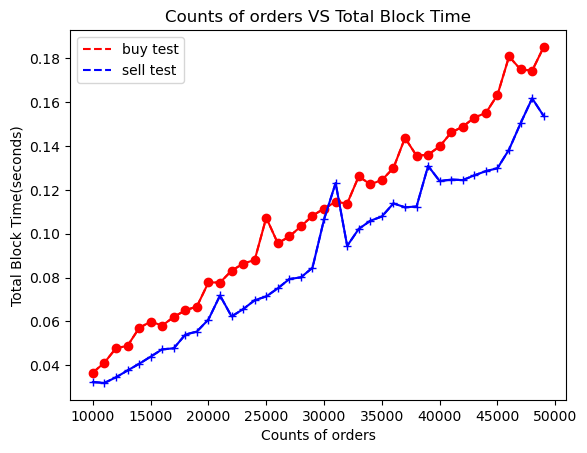

In [26]:
buy_line = plt.plot(buy_counts, buy_times, 'r--', label = 'buy test')
sell_line = plt.plot(sell_counts, sell_times, 'b--', label = 'sell test')
plt.plot(buy_counts, buy_times, 'ro-', sell_counts, sell_times, 'b+-')
plt.title('Counts of orders VS Total Block Time')
plt.xlabel('Counts of orders')
plt.ylabel('Total Block Time(seconds)')
plt.legend()
plt.show()